In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2025-09-12 16:56:53.261156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757696213.284523     832 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757696213.291383     832 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [3]:
data_dir = '/kaggle/input/split-monkey-pox-dataset/Monkey split'
target_size = (224, 224)
batch_size = 128

train = train_datagen.flow_from_directory(
    f'{data_dir}/train',
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical'
)

validation = validation_datagen.flow_from_directory(
    f'{data_dir}/val',
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical'
)

test = validation_datagen.flow_from_directory(
    f'{data_dir}/test',
    target_size=(224, 224),
    batch_size= 32,
    shuffle=False,
    class_mode='categorical'
)

Found 4200 images belonging to 6 classes.
Found 900 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


In [4]:
input_shape = (224, 224, 3)

model = models.Sequential([
    layers.Input(shape=input_shape),   # Better way to define input shape
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax'),
])

# No need for model.build(...)
model.summary()


I0000 00:00:1757696217.581393     832 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,654 (670.52 KB)

 Trainable params: 171,654 (670.52 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,654 (670.52 KB)

 Trainable params: 171,654 (670.52 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    x=train,
    validation_data=validation,
    verbose=1,
    epochs=30,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1757696222.708087     903 service.cc:148] XLA service 0x7bbd300124c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757696222.708150     903 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1757696223.089322     903 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/132 ━━━━━━━━━━━━━━━━━━━━ 16:08 7s/step - accuracy: 0.2188 - loss: 1.7928

I0000 00:00:1757696226.533075     903 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


132/132 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.1999 - loss: 1.7748 - val_accuracy: 0.3100 - val_loss: 1.6372
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 342ms/step - accuracy: 0.3306 - loss: 1.5731 - val_accuracy: 0.3889 - val_loss: 1.4866
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.3940 - loss: 1.4576 - val_accuracy: 0.3811 - val_loss: 1.4070
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 343ms/step - accuracy: 0.4384 - loss: 1.3537 - val_accuracy: 0.4744 - val_loss: 1.3147
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 341ms/step - accuracy: 0.5345 - loss: 1.1714 - val_accuracy: 0.5611 - val_loss: 1.0970
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.5831 - loss: 1.0605 - val_accuracy: 0.6400 - val_loss: 0.9246
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.6311 - loss: 0.9290 - val_accuracy: 0.6711 - val_loss: 0.8183
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 47s 353ms/step - accuracy: 0.6781 - loss: 0.8355 - val

In [8]:
loss, accuracy = model.evaluate(test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9717 - loss: 0.0799


In [9]:
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.9566666483879089
Loss: 0.1261937916278839


In [15]:
class_indices = test.class_indices

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

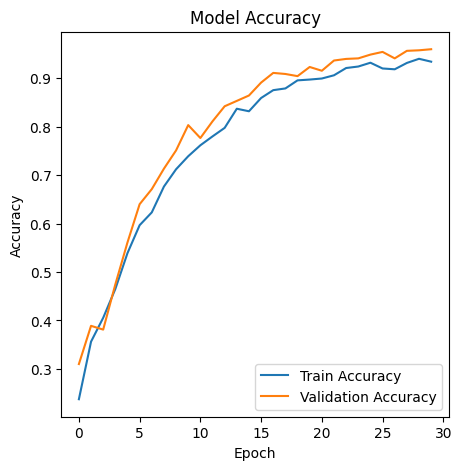

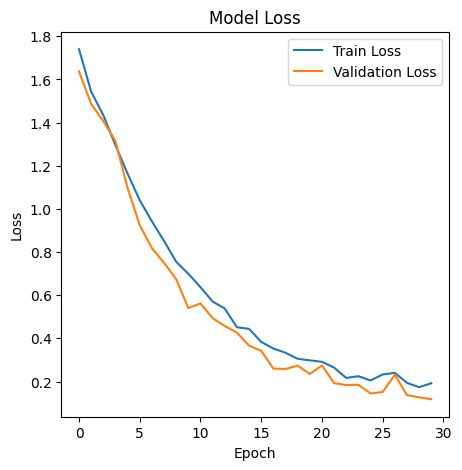

In [12]:
plt.figure(figsize=(5, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [13]:
from sklearn import metrics
import numpy as np

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test.classes
class_labels = list(class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
              precision    recall  f1-score   support

  Chickenpox       0.92      0.98      0.95       150
      Cowpox       0.99      1.00      0.99       150
        HFMD       0.99      0.93      0.96       150
     Healthy       0.94      0.97      0.95       150
     Measles       0.95      1.00      0.97       150
   Monkeypox       0.96      0.86      0.91       150

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900



<Axes: >

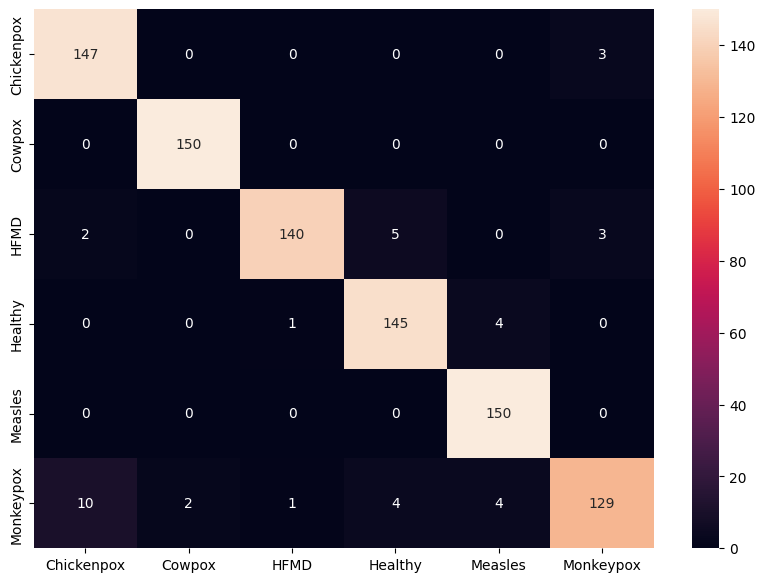

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Chickenpox', 'Cowpox', 'HFMD','Healthy','Measles','Monkeypox']],
                  columns = [i for i in ['Chickenpox', 'Cowpox', 'HFMD','Healthy','Measles','Monkeypox']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')